In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
order_df = pd.read_csv('Dataset/orders.csv')
products_df = pd.read_csv('Dataset/products.csv')
order_products_train_df = pd.read_csv('Dataset/order_products__train.csv')
order_products_prior_df = pd.read_csv('Dataset/order_products__prior.csv')
departments_df = pd.read_csv('Dataset/departments.csv')
aisles_df = pd.read_csv('Dataset/aisles.csv')

# To predict the products that will be re-ordered

**The Order dataset has the details of the orders placed by the customers.**

Order id - Order id of the order placed by the customer.
User id - id of the customer.
eval set - to which set (prior, train, test) an order belongs.
order number - the order number of each customers.
order_dow - ordered day of the order placed.
order_hour_of_day - hour of the day order was placed.
days_since_prior_order - Interval between the previous order and the current orders.

In [5]:
order_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


**Order products train**

order id - order id of the order placed by customer.
product id - id of the item that the customer ordered.
add to cart order - the order the products were added to the cart.
reordered - the products that were ordered in the previous order and the current order.

In [6]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


**order products prior**

order id - order id of the order placed by customer.
product id - id of the item that the customer ordered.
add to cart order - the order the products were added to the cart.
reordered - the products that were ordered in the previous order and the current order.

In [7]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


**departments**
the details of the department that the products belong to

department id - id of the department
department - name of the deaprtment

In [64]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


**ailse**

details of the aisle

aisle - id of the aisle
aisle - Name of the aisle

In [65]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [15]:
val_cnts = order_df.eval_set.value_counts()
val_cnts

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

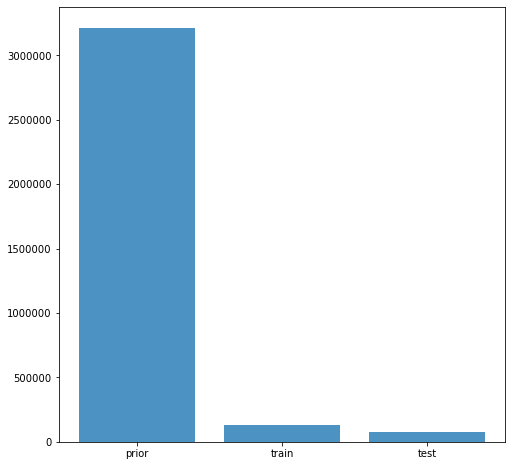

In [29]:
plt.figure(figsize=(8,8))
plt.bar(val_cnts.index,val_cnts.values,alpha=0.8)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,8))
plt.show()

the dataset provided the highest records of the prior compared to the train and test

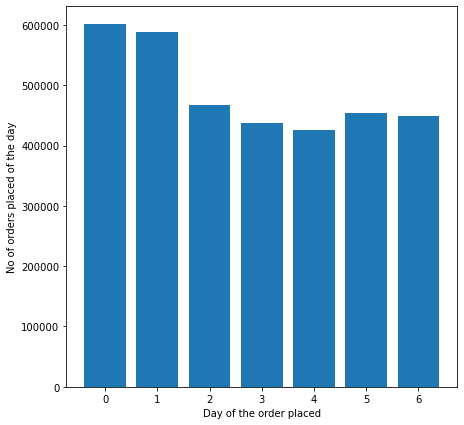

In [76]:
order_day_val_cnts = order_df.order_dow.value_counts()

plt.figure(figsize=(7,7))
plt.bar(order_day_val_cnts.index,order_day_val_cnts.values)
plt.xlabel('Day of the order placed')
plt.ylabel('No of orders placed of the day')
plt.show()

The day of 0 and 1 may be considred as saturday and sunday they have the highest records placed compared to the other days. Tn that case considering that holidays get more orders than weekdays.

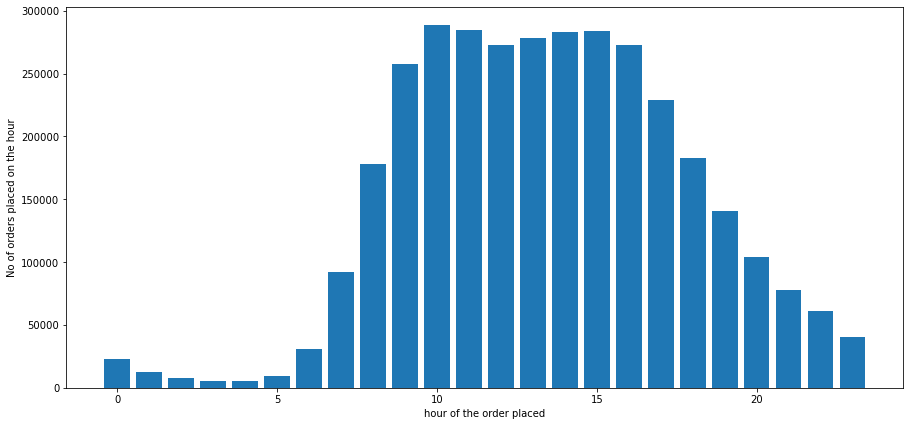

In [79]:
ordered_hours_val_cnts = order_df.order_hour_of_day.value_counts()

plt.figure(figsize=(15,7))
plt.bar(ordered_hours_val_cnts.index,ordered_hours_val_cnts.values)
plt.xlabel('hour of the order placed')
plt.ylabel('No of orders placed on the hour')
plt.show()

This shows that time period between the 10am and 4pm has highest orders placed. 

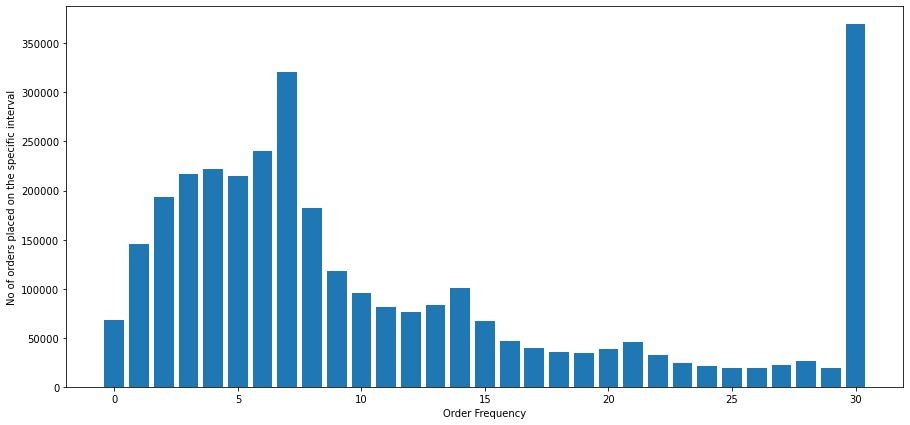

In [83]:
order_frequency = order_df.days_since_prior_order.value_counts()

plt.figure(figsize=(15,7))
plt.bar(order_frequency.index,order_frequency.values)
plt.xlabel('Order Frequency')
plt.ylabel('No of orders placed on the specific interval')
plt.show()

The customers are more likely to order once in a week and monthly once.